# **Evaluación 3**
Hernández Fraijo Mario Gilberto

In [2]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


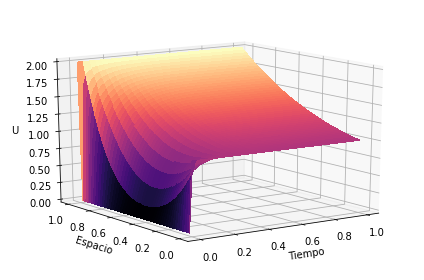

In [5]:
#Condiciones de la frontera tipo Dirichlet

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval
#Tamaño
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Puntos en  t
t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)
#Usamos la suposición que se dio en la explicación del inicio 
D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Cambiamos la condición inicial
U[:,0] = 0

#----- Dirichlet boundary conditions -----
#Cambiamos las condiciones de frontera
U[0,:] = 1
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.magma, antialiased=False)


#Grafica de la solución 
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espacio')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init(15, -125)
plt.show()

Como se puede observar, en t=0 el tubo está vacío. Según como va avanzando en el tiempo la concentración del químico U tiende a estabilizarse, debido a que la curva (que se aproxima a una recta)cambia de 1 a 2, por lo que deberia de estar en aproximadamente en un punto de equilibrio.

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


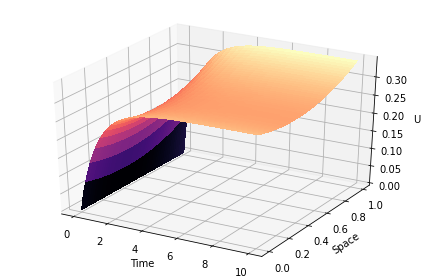

In [6]:
M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval
#Tamaño 
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Tiempo en los que calcularemos la solución 
t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)
#Se cambia los coeficientes de acuerdo con la explicación del inicio
D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s

#Puntos en x,y en t
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition ----- 
#---Se cambia la condición inicial a 0---- 
U[:,0] = 0

#----- Neumann boundary conditions -----
leftBC = np.arange(1, N+1)
#Modificamos esta parte, con el fin de obtener el mismo tamaño que leftBC 
f = np.ones([N +1,1]) *0.1

rightBC = np.arange(1, N+1)
#Modificamos esta parte, con el fin de obtener el mismo tamaño que leftBC 
g = np.ones([N+1,1]) *0.2

#Empezamos a hacer el calculo necesario con un for en el rango deseado 
for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.magma, antialiased=False)


#Grafica de la solución 
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Podemos resaltar que las partes laterales crecen de manera similiar, pero no igual. Además de ello, la concentración disminuye en el centro y aumenta en los laterales. 

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


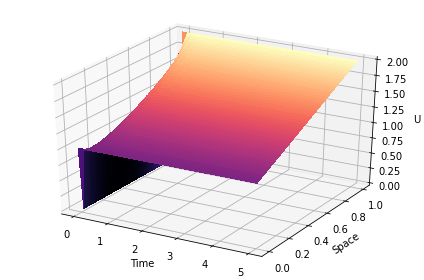

In [7]:
#Condiciones de la frontera tipo Dirichlet

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval
#Tamaño
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)
#Puntos en t
t0 = 0
tF = 5

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;
#Puntos en x y en t
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
#Condición inicial que se nos da 
U[:,0] = 0

#----- Dirichlet boundary conditions -----
#Modificamos las condiciones de frontera que se nos dan 
U[0,:] = 1
U[-1,:] = 2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.magma, antialiased=False)


#Hacemos la grafica de la solución
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Podemos ver que este ejercicio se parece al ejercicio 1, la diferencia que son dos gases que no reaccionan, tal y como lo menciona son gases del mismo tipo. Observando la gráfica, cuando se varía a $\alpha$,esta va a formar parabolas que poco a poco iran formando una línea recta.